<a href="https://colab.research.google.com/github/klarcika/TZ/blob/main/Naloga6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Preberite datoteko wineReviews.csv in izpišite prve tri ocene vin.
import pandas as pd
df=pd.read_csv("wineReviews.csv", index_col=0, sep="\t")
df.head(3)

,country,description
wineId,,
219,Hungary,From a vineyard in Northern Tokaj this dry Fur...
271,Greece,"Lively aromas of lemon, grapefruit and melon s..."
308,Greece,This fuller-bodied white blend offers pineappl...


In [ ]:
#2. Izpišite iz katerih držav prihajajo ocenjena vina
# in koliko jih prihaja iz posamezne države.
df.groupby(['country']).count()

,description
country,
Croatia,73
Greece,466
Hungary,146
Slovenia,87


In [7]:
# 3. Združite ocene vseh slovenskih vin v skupno besedilo. To besedilo:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package chat80 to /root/nltk_data...
       |   Package chat80 is already up-to-date!
       | Downloading package cmudict to /root/nltk_data...
       |   Package cmudict is already up-to-date!
       | Downloading package conll2000 to /root/nltk_data...
       |   Package conll2000 is already up-to-date!
       | Downloading package conll2002 to /root/nltk_data...
       |   Package conll2002 is already up-to-date!
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Package dependency_treebank is already up-to-date!
       | Downloading package genesis to /root/nltk_data...
       |   Package genesis is already up-to-date!
       | Downloading package gutenberg to /root/nltk_data...
       |   Package gutenberg is already


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [21]:
example_slo = df[df["country"] == 'Slovenia']

In [22]:
# tokeniziraje in izpišite 8 tokenov, ki imajo najvišjo frekvenco pojavitve,
from nltk.tokenize import word_tokenize
from nltk.text import Text
seznam_tokeni = word_tokenize(example_slo) # tokenizacija besedila - dobimo seznam vseh tokenov
seznam_tokeni = [beseda.lower() for beseda in seznam_tokeni] # vse pretvorimo v male črke
seznam_tokeni[:8] # Izpišemo prvi 8 tokenov

['earthy', 'with', 'hints', 'of', 'roasted', 'nuts', 'and', 'dried']

and            4
with           3
,              2
is             2
a              2
.              2
the            2
earthy         1
hints          1
of             1
roasted        1
nuts           1
dried          1
herb           1
this           1


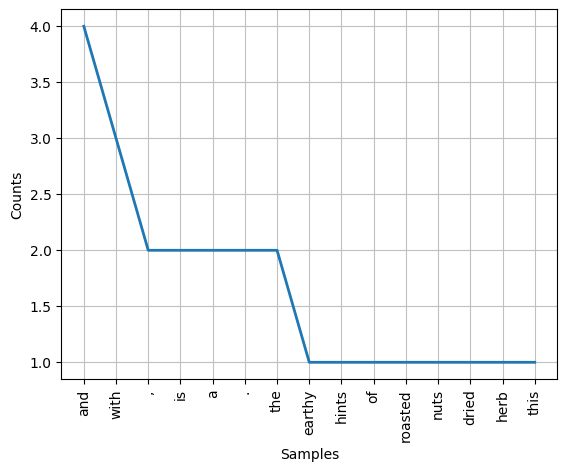

<Axes: xlabel='Samples', ylabel='Counts'>

In [24]:
# izrišite graf, ki bo ponazoril, katerih 15 tokenov se
#     največkrat pojavi v oceni slovenskih vin,
from nltk import FreqDist
tokeni_freq = FreqDist(seznam_tokeni)

for beseda, pogostost in tokeni_freq.most_common(15):
    print("{w:<15}{f}".format(w=beseda, f=pogostost))

tokeni_freq.plot(15, cumulative=False)

In [25]:
# iz besedila odstranite vse "stop words" (besede brez pomena in ločila)
from nltk.corpus import stopwords
import string
stop_list = stopwords.words('english') + list(string.punctuation) #združimo
tokeni_brez_stop = [token for token in seznam_tokeni if token not in stop_list]

tokeni_frekvenca_brez_stop = FreqDist(tokeni_brez_stop)

In [27]:
# ter izmed preostalih tokenov izpišite 5 takšnih, ki imajo najvišjo frekvenco pojavitve,
for word, freq in tokeni_frekvenca_brez_stop.most_common(5): #preverimo katere so zdaj tiste najpogostejše besede
    print("{w:<5}{f}".format(w=word, f=freq))

earthy1
hints1
roasted1
nuts 1
dried1


In [30]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokeni_stemm = [stemmer.stem(t) for t in tokeni_brez_stop ]
tokeni_frekvenca_stemm = FreqDist(tokeni_stemm)

for word, freq in tokeni_frekvenca_stemm.most_common(5):
    print("{w:<15}{f}".format(w=word, f=freq))

earthi         1
hint           1
roast          1
nut            1
dri            1


In [31]:
# iz tako prečiščenega besedila izpišite 5 najpogostejših bigramov in trigramov.
from nltk import ngrams

dvojcki = FreqDist(ngrams(tokeni_stemm, 2))
for phrase, freq in dvojcki.most_common(10):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('earthi', 'hint')            1
('hint', 'roast')             1
('roast', 'nut')              1
('nut', 'dri')                1
('dri', 'herb')               1
('herb', 'uniqu')             1
('uniqu', 'savori')           1
('savori', 'sauvignon')       1
('sauvignon', 'would')        1
('would', 'pair')             1


In [32]:
trojcki = FreqDist(ngrams(tokeni_stemm, 3))
for phrase, freq in trojcki.most_common(10):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('earthi', 'hint', 'roast')   1
('hint', 'roast', 'nut')      1
('roast', 'nut', 'dri')       1
('nut', 'dri', 'herb')        1
('dri', 'herb', 'uniqu')      1
('herb', 'uniqu', 'savori')   1
('uniqu', 'savori', 'sauvignon')1
('savori', 'sauvignon', 'would')1
('sauvignon', 'would', 'pair')1
('would', 'pair', 'well')     1


In [34]:
# 4. V datafram-u ustvarite nov stolpec poimenovan processed,
#kamor shranite besedilo ocen (description), ki je:

# v celoti zapisano z malimi črkami,
# brez "stop words" (besede brez pomena in ločila),
# besede morajo biti krnjene (nad njimi uporabite stemming).
processed=df[df["country"]=='Slovenia'].iloc[0].description

In [ ]:
# 5. S pomočjo TfidfVectorizer razdelite predprocesirana besedila ocen
 #(iz stolpca processed) na unigrame in
#izpišite koliko je vseh nastalih tokenov (features).